# ERCEMAPI 2022

## Minicurso **Introdução às Redes Neurais Profundas**

## Parte I - Conceitos Básicos, TensorFlow e Keras

Prof. Josenildo C. da Silva (IFMA)

Prof. Raimundo Osvaldo Vieira (IFMA)


# Setup

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import numpy as np
from numpy import random

In [3]:
#from sklearn.datasets import fetch_openml

In [4]:
import tensorflow as tf

# Representação de Dados para Redes Neurais

Os dados em tensorflow são representados por estruturas especiais chamadas de tensores, discutidos em detalhes nas próximas seções.



## Tensores

Um **Tensor** é uma coleção de dados do mesmo tipo (dtype), geralmente números. São similares ao array do ```numpy``` . (Chollet,2021), Cap. 2

### Principais atributos de um Tensor

- Número de eixos (rank)
- Formato (shape)
- Tipo (dtype)

### Tensores de rank 0: escalares

In [5]:
x0 = np.array(12)

Escalares não possuem dimensão, ou seja, são objetos de **dimensao zero**.

In [6]:
x0.ndim

0

In [7]:
x0.shape

()

### Tensores de rank 1: vetores

In [8]:
x1 = np.array([12,8,-1,4,56, 14])
x1

array([12,  8, -1,  4, 56, 14])

Vetores possuem **uma** dimensão

In [9]:
x1.ndim

1

Em particular, este tensor porssui 6 elementos na sua única dimensão. 

In [10]:
x1.shape

(6,)

### Tensores de rank 2: matrizes 

In [11]:
x2 = np.array([[5, 78, 2, 34, 0], [6, 79, 3, 35, 1], [7, 80, 4, 36, 2]])

Este tensor possui duas dimensões

In [12]:
x2.ndim

2

In [13]:
x2.shape

(3, 5)

### Tensores de rank 3: cubos

In [14]:
x3 = np.array([[[5, 78, 2, 34, 0],
 [6, 79, 3, 35, 1],
 [7, 80, 4, 36, 2]],
 [[5, 78, 2, 34, 0],
 [6, 79, 3, 35, 1],
 [7, 80, 4, 36, 2]],
 [[5, 78, 2, 34, 0],
 [6, 79, 3, 35, 1],
 [7, 80, 4, 36, 2]]])

In [15]:
x3.ndim

3

In [16]:
x3.shape

(3, 3, 5)

### Tensores de rank maior que 3

In [17]:
x4 = np.array([x3,x3*2])
print(x4)

[[[[  5  78   2  34   0]
   [  6  79   3  35   1]
   [  7  80   4  36   2]]

  [[  5  78   2  34   0]
   [  6  79   3  35   1]
   [  7  80   4  36   2]]

  [[  5  78   2  34   0]
   [  6  79   3  35   1]
   [  7  80   4  36   2]]]


 [[[ 10 156   4  68   0]
   [ 12 158   6  70   2]
   [ 14 160   8  72   4]]

  [[ 10 156   4  68   0]
   [ 12 158   6  70   2]
   [ 14 160   8  72   4]]

  [[ 10 156   4  68   0]
   [ 12 158   6  70   2]
   [ 14 160   8  72   4]]]]


In [18]:
x4.ndim

4

In [19]:
x4.shape

(2, 3, 3, 5)

**Exemplo 1**
- Um dia da semana é um número, rank 0
- Uma semana é um vetor de 7 dias, rank 1
- Um mês é um vetor de 4 semanas, rank 2
- Um ano é um vetor de 12 meses, rank 3
- Uma década é um vetor de 10 anos, rank 4


**Exemplo 2**
- Um pixel é representado por um valor, rank 0
- Uma linha de uma imagem é um vetor de pixel, rank 1
- Uma imagem é um constituido por linhas, rank 2
- Uma imagem colorida possui uma imagem para cada canal, rank 3

**Exemplo 3**

In [20]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [21]:
train_images.ndim

3

In [22]:
train_images.shape

(60000, 28, 28)

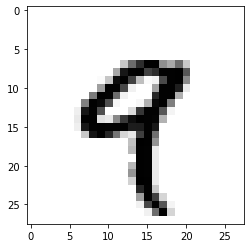

In [23]:
digit_image = train_images[4] # se necessário use reshape(28,28)
fig,ax = plt.subplots()
ax.imshow(X=digit_image, cmap ='binary')
plt.show()

In [24]:
train_images.dtype

dtype('uint8')

## Manipulação de Tensores com Numpy

### Mudar a forma (reshape)

In [25]:
x = np.array([[0., 1.], [2., 3.], [4., 5.],[6.,7.]])

In [26]:
print(x)

[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]]


In [27]:
x.ndim

2

In [28]:
x.shape

(4, 2)

In [29]:
x=x.reshape((2,2,2))

In [30]:
x.shape

(2, 2, 2)

In [31]:
print(x)

[[[0. 1.]
  [2. 3.]]

 [[4. 5.]
  [6. 7.]]]


**Caso especial**: transposição

In [32]:
x = np.array([[0., 1., 2.], [3.,4.,5.],[6.,7.,8.]])
print(x)

[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]


In [33]:
x.transpose()

array([[0., 3., 6.],
       [1., 4., 7.],
       [2., 5., 8.]])

### Fatiamento

In [34]:
fatia = train_images[50:60]

In [35]:
fatia.ndim

3

In [36]:
fatia.shape

(10, 28, 28)

Podemos selecionar fatias em qualquer dimensão. 

In [37]:
fatia = train_images[50:60,14:,14:]

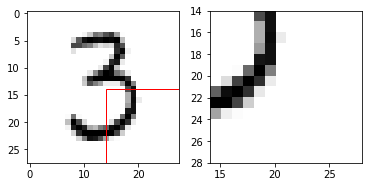

In [38]:
import matplotlib.patches as patches
crop = fatia[0].reshape(14,14)
fig,(ax1,ax2) = plt.subplots(ncols=2)
ax2.imshow(X=crop, cmap ='binary',origin='upper',extent=(14,28,28,14))
ax1.imshow(X=train_images[50].reshape(28,28),cmap='binary',origin='upper')
rect = patches.Rectangle((14,14), 14, 14, linewidth=1, edgecolor='r', facecolor='none')
ax1.add_patch(rect)
plt.show()

Uma utilização frequente de fatiamente é a divisão de um dataset em *batches* para processamento durante o treinamento de uma rede neural

### Produto entre tensores

O produto entre tensores, ou dot product, é uma das operações fundamentais realizada durante o treinamento de uma rede neural.   


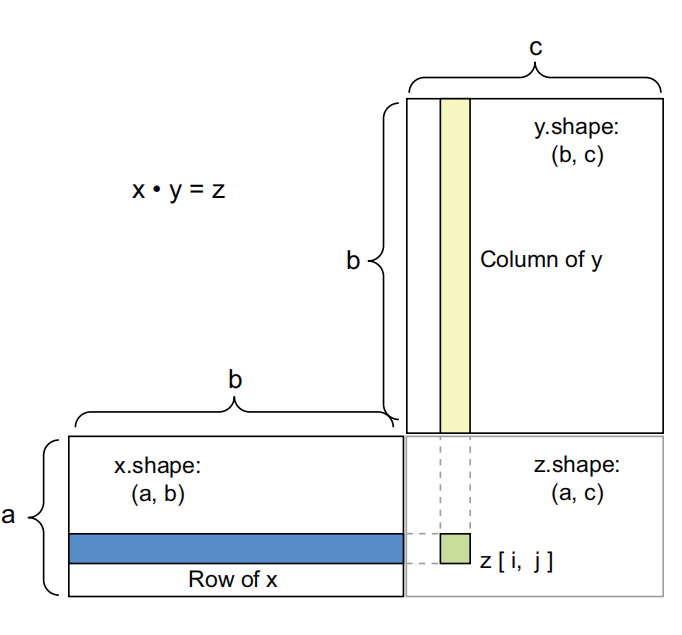

In [39]:
a=2
b=3
c=2
 
x = np.random.random((a,b))
y = np.random.random((b,c))
z = np.dot(x, y)
print(z)

[[0.12084369 0.19476588]
 [0.59003171 0.91599028]]


# Tensorflow

**Tensorflow** é uma plataforma desenvolvida pela Google em Python para aprendizagem de máquina.  

Provê varias funcionalidades similares ao numpy, mas extende o escopo em vários aspectos. 
- suporte para CPU, GPU, TPU
- computação distribuída
- exporta para C++, JavaScript, etc


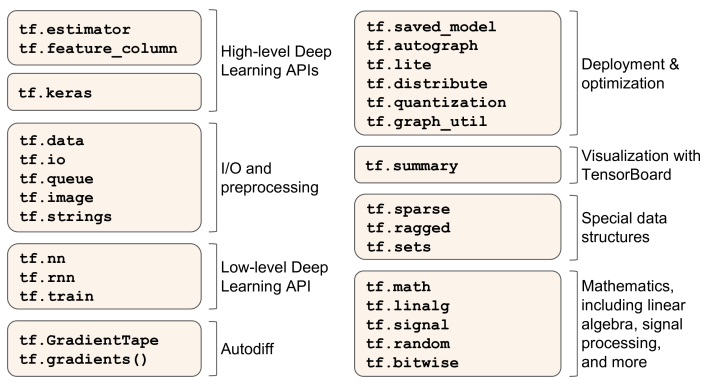

## Primeiros passos em TF (Chollet, 2nd Ed., Sec. 3.5 ) (Geron, Cap. 12)

### Constantes

In [40]:
a = tf.constant(5)
a

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [41]:
b = tf.constant([1,2,3])
b

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 2, 3], dtype=int32)>

In [42]:
c= tf.constant([[1, 2],[3, 4]])
c

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1, 2],
       [3, 4]], dtype=int32)>

#### 0s e 1s

In [43]:
x = tf.ones(shape=(3, 2)) 
print(x)

tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [44]:
x = tf.zeros(shape=(4,5))
print(x)

tf.Tensor(
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]], shape=(4, 5), dtype=float32)


### Valores Aleatórios

In [45]:
x = tf.random.normal(shape=(3000,), mean=0., stddev=1.)

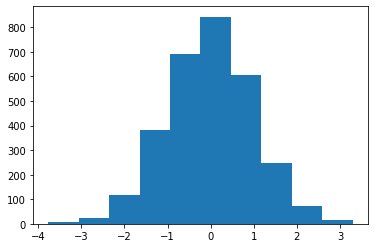

In [46]:
plt.hist(x)
plt.show()

In [47]:
x = tf.random.normal(shape=(3, 2), mean=0., stddev=1.)
x

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[ 3.0589097 ,  1.1717892 ],
       [ 0.5625518 , -1.2959906 ],
       [-0.57318103,  1.1338974 ]], dtype=float32)>

⚠ **ATENÇÃO** ⚠

Tensores são constantes no tensorflow

In [48]:
# Atribuição é ok em numpy
x = np.ones(shape=(2, 2))
x[0, 0] = 0.
x

array([[0., 1.],
       [1., 1.]])

In [49]:
# Atribuição gera erro tem tensorflow!
x = tf.ones(shape=(2, 2))
x[0, 0] = 0. 

TypeError: ignored

### Variáveis

In [ ]:
v = tf.Variable(initial_value=4)

In [ ]:
v.shape

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 2)))
v

In [50]:
v.shape

NameError: ignored

In [ ]:
v.assign([[0,4],[1,4],[2,4]])

In [51]:
v[0].assign([3,3])

NameError: ignored

In [ ]:
v[0,0].assign(7)

In [52]:
v.assign_add(tf.ones((3, 2)))

NameError: ignored

### Operações Matemáticas com Tensores

In [53]:
a = tf.constant([[2, 2],[1,.5]])
a

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[2. , 2. ],
       [1. , 0.5]], dtype=float32)>

In [54]:
b = tf.square(a)
b

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[4.  , 4.  ],
       [1.  , 0.25]], dtype=float32)>

In [55]:
c = tf.sqrt(a) 
c

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1.4142135 , 1.4142135 ],
       [1.        , 0.70710677]], dtype=float32)>

In [56]:
d = b + c 
d

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[5.4142137 , 5.4142137 ],
       [2.        , 0.95710677]], dtype=float32)>

In [57]:
e = tf.matmul(a, b) # alternativa a@b
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[10.   ,  8.5  ],
       [ 4.5  ,  4.125]], dtype=float32)>

In [58]:
e *= d
e

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[54.142136 , 46.020817 ],
       [ 9.       ,  3.9480655]], dtype=float32)>

In [59]:
print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(a @ b, "\n")
print(tf.matmul(a,b), "\n")

tf.Tensor(
[[6.   6.  ]
 [2.   0.75]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[8.    8.   ]
 [1.    0.125]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[10.     8.5  ]
 [ 4.5    4.125]], shape=(2, 2), dtype=float32) 

tf.Tensor(
[[10.     8.5  ]
 [ 4.5    4.125]], shape=(2, 2), dtype=float32) 



### Gradientes

GradientTape permite calculara a derivada de uma dada função em relação a uma de suas variáveis

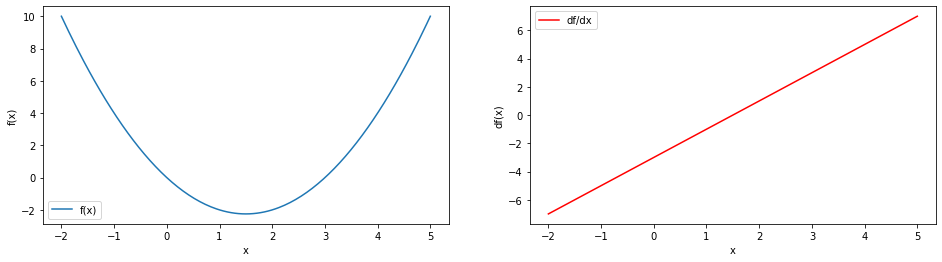

In [60]:
x = tf.linspace(-2, 5, 200+1)

with tf.GradientTape() as tape:
  tape.watch(x)
  #f = tf.nn.sigmoid(x)
  #f = tf.math.pow(x,3)
  #f = tf.tanh(x)
  #f = tf.nn.softsign(x)
  f = x**2-3*x

df_dx = tape.gradient(f, x)
fig, axes = plt.subplots(ncols=2,figsize=(16,4))
axes[0].plot(x, f, label='f(x)')
axes[1].plot(x, df_dx, label='df/dx',color='red')
axes[0].legend()
axes[1].legend()
axes[0].set_xlabel('x')
axes[1].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[1].set_ylabel('df(x)')
plt.show()

Também é possível calcular a derivada de segunda ordem

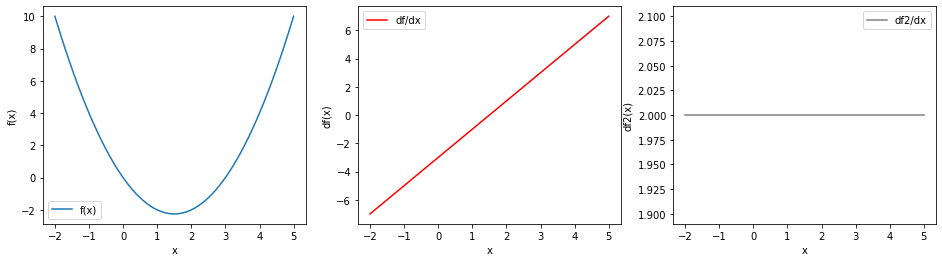

In [61]:
x = tf.linspace(-2, 5, 200+1)

with tf.GradientTape() as tape_2:
  tape_2.watch(x)
  with tf.GradientTape() as tape_1:
    tape_1.watch(x)
    #f = tf.nn.sigmoid(x)
    #f = tf.math.pow(x,3)
    #f = tf.tanh(x)
    #f = tf.nn.softsign(x)
    f = x**2-3*x
  df_dx = tape_1.gradient(f, x)
df2_dx = tape_2.gradient(df_dx, x)

fig, axes = plt.subplots(ncols=3,figsize=(16,4))
axes[0].plot(x, f, label='f(x)')
axes[1].plot(x, df_dx, label='df/dx',color='red')
axes[2].plot(x, df2_dx, label='df2/dx',color='gray')
axes[0].set_xlabel('x')
axes[1].set_xlabel('x')
axes[2].set_xlabel('x')
axes[0].set_ylabel('f(x)')
axes[1].set_ylabel('df(x)')
axes[2].set_ylabel('df2(x)')
axes[0].legend()
axes[1].legend()
axes[2].legend()
plt.show()

O GradientTape é utilizado para calcular a derivada da função de custo durante o treinamento de redes neurais

# TF Keras

**Keras** é uma API de alto nível desenvolvido para facilitar o uso de tensorflow. Keras foi lançado em 2015, e inicialmente foi desenvolvido sobre o Theano, outra
biblioteca para manipulação de tensores que também tem diferenciação automática de
funções. Em 2018 o Keras foi escolhido pelo Tensoflow como sua API de alto nível oficial.

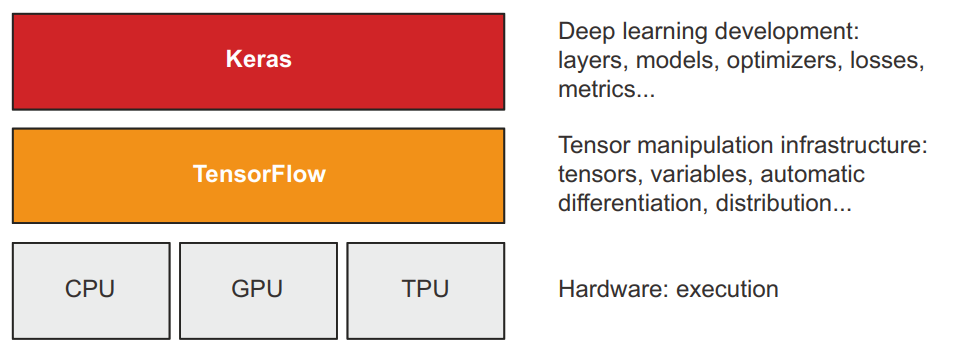

## Layers

Camadas são unidades de processamento no Keras que recebem um tensor de entrada e produzem outro tensor de saída. Os pesos de uma camada são aprendidos durante o treinamento da rede.

In [62]:
from tensorflow import keras
from keras import layers

In [63]:
class SimpleDense(keras.layers.Layer): 
  def __init__(self, units, activation=None):
    super().__init__()
    self.units = units
    self.activation = activation
  def build(self, input_shape): 
    input_dim = input_shape[-1]
    self.W = self.add_weight(shape=(input_dim, self.units), 
    initializer="random_normal")
    self.b = self.add_weight(shape=(self.units,),
    initializer="zeros")
  def call(self, inputs): 
    y = tf.matmul(inputs, self.W) + self.b
    if self.activation is not None:
      y = self.activation(y)
    return y

In [64]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu) 
input_tensor = tf.ones(shape=(2, 784)) 
output_tensor = my_dense(input_tensor)

In [65]:
print(output_tensor.shape)

(2, 32)


O formato da entrada é descoberto de modo automático, não é ncessário informar. 


In [66]:
from tensorflow.keras import layers
layer = layers.Dense(units=32, activation="relu") 

In [67]:
output = layer(input_tensor) # input_shape detectado automáticamente

In [68]:
output.shape

TensorShape([2, 32])

## Model

Uma rede neural em Keras é um grafo de camadas represendado pela classe Model. 
O modelo mais simples é o Sequential, mas o Keras permite
a definição de modelos com topologia complexa, não-sequencial.

> Picking the **right network** architecture is more an art than a science, and although
there are some best practices and principles you can rely on, only practice can help
you become a proper neural-network architect" -- (Chollet, Cap. 3, p. 87)

Exemplo de modelo sequencial

In [69]:
model = keras.Sequential([
 layers.Dense(512, activation="relu"),
 layers.Dense(10, activation="softmax")
])

Exemplos de modelos não-sequenciais:
- Multiheads
- Two branches
- Residuals

## Compilação

O método compile() configura o processo de treinamento. Geralmente são informados:
- o otimizador, 
- a função de custo e 
- as métricas a serem utilizados no
treinamento.

In [70]:
model.compile(optimizer="rmsprop",
 loss="sparse_categorical_crossentropy",
 metrics=["accuracy"])

# Keras Datasets

O Keras tem uma pequena coleção de datasets
- MNIST digits classification dataset.
- CIFAR10 small images classification dataset.
- CIFAR100 small images classification dataset.
- IMDB movie review sentiment classification dataset.
- Reuters newswire classification dataset.
- Fashion MNIST dataset, an alternative to MNIST.
- Boston Housing price regression dataset.

Para uma coleção mais completa, você pode utilizar o TF Datasets, que apresenta uma larga quantidade de datasets de exemplo

https://www.tensorflow.org/datasets/catalog/overview

Usaremos o dataset MNIST 

In [73]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

O dataset MNIST possui 70 mil exemplos de dígitos escritos à mão, com forma de 784 pixels de imagens 28x28

In [74]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Vamos visualizar alguns exemplos deste dataset
 



**Nota** Os rótulo no dataset do tensorflow são do tipo int

Precisamos modificar os dados para que os valores sejam reescalados entre 0 e 1

In [75]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255

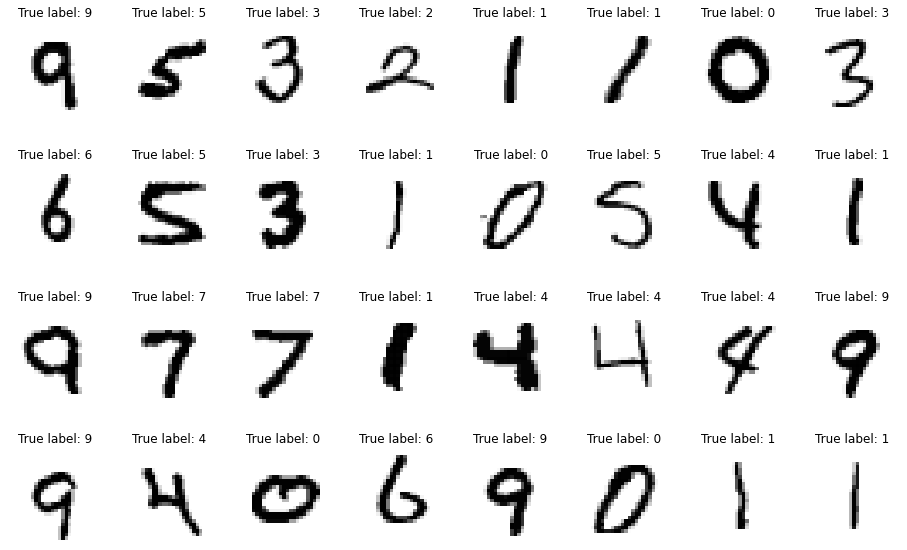

In [76]:
fig,axes = plt.subplots(nrows=4,ncols=8,figsize=(16,10))
for ax_r in axes:
  for ax in ax_r:
    r = random.randint(0,len(train_labels))
    some_digit_image =train_images[r].reshape(28,28)
    ax.imshow(X=some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
    ax.set_title("True label: "+str(train_labels[r]))
    ax.axis("off")
#plt.axis("off")
plt.show()

# Treinamento

In [77]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=128)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 0.2604 - accuracy: 0.9238
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 0.1049 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0691 - accuracy: 0.9792
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0505 - accuracy: 0.9851
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0387 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0292 - accuracy: 0.9912
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.9936
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0182 - accuracy: 0.9948
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0139 - accuracy: 0.9961
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.0105 - accuracy: 0.9970

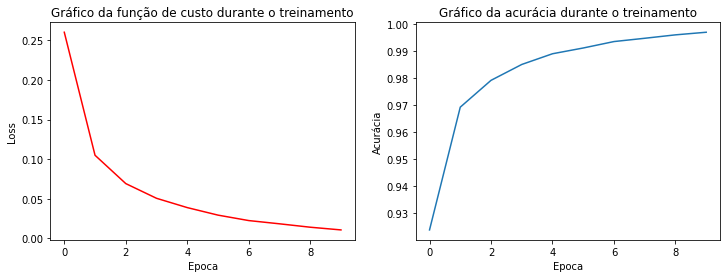

In [78]:
fig, axes = plt.subplots(ncols=2, figsize=(12,4))
axes[0].plot(history.history['loss'],color='red')
axes[0].set_title("Gráfico da função de custo durante o treinamento")
axes[0].set_xlabel("Epoca")
axes[0].set_ylabel("Loss")
axes[1].plot(history.history['accuracy'])
axes[1].set_title("Gráfico da acurácia durante o treinamento")
axes[1].set_xlabel("Epoca")
axes[1].set_ylabel("Acurácia")
plt.show()

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 512)               401920    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


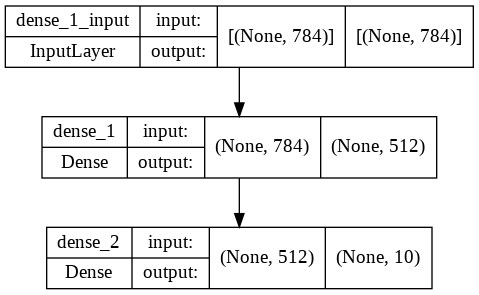

In [80]:
keras.utils.plot_model(model,show_shapes=True)

# Referências

- CHOLLET, F. (2021) "Deep Learning with Python, Tensorflow and Keras", 2nd. Ed. Manning.